In [2]:
import time
import pandas as pd
from selenium import webdriver as wd
from tqdm.notebook import tqdm
import re

driver = wd.Chrome("C:\chromedriver")#,options=options)
url = 'https://m.cafe.naver.com/joonggonara'
driver.get(url)
time.sleep(1)

for page_num in range(1,11):
    driver.find_element_by_xpath('//*[@id="ct"]/div/div/a').click()
    time.sleep(0.5)
    
full = []

for i in range(201):

    fulls = driver.find_elements_by_css_selector("#ct > div > ul.list_area > li:nth-child("+str(i)+") > a.txt_area > strong")

    for f in fulls:
        full.append(f.text)



In [ ]:
#listings > ol > li.hotel.deal-of-the-day.secret-price-badge-available > article > section > div > h3 > a
#listings > ol > li.hotel.sponsored.secret-price-badge-available > article > section > div > h3 > a
#listings > ol > li:nth-child(3) > article > section > div > h3 > a

In [ ]:
#listings > ol > li.hotel.sponsored > article > section > div > div > div.additional-details.resp-module > ul > li.hmvt8258-amenity.pool
#listings > ol > li.hotel.sponsored > article > section > div > div > div.additional-details.resp-module > ul > li.hmvt8258-amenity.pool
#listings > ol > li.hotel.sold-out-flag.vip.sold-out > article > section > div > div > div.additional-details.resp-module > ul > li.hmvt8258-amenity.pool




#f-label-popular-128

#listings > ol > li.hotel.sponsored > article > section > div > div > div.additional-details.resp-module > ul > li.hmvt8258-amenity.pool
//*[@id="listings"]/ol/li[2]/article/section/div/div/div[1]/ul/li[1]
//*[@id="listings"]/ol/li[i]/article/section/div/div/div[1]/ul/li[1]


In [411]:
import time
import pandas as pd
from selenium import webdriver as wd
from tqdm.notebook import tqdm
import re

driver = wd.Chrome("C:\chromedriver")#,options=options)
url = 'https://kr.hotels.com/search.do?resolved-location=REGION%3A1644457%3AUNKNOWN%3AUNKNOWN&f-star-rating=5,4,3,2,1&f-guest-rating-min=1&destination-id=1644457&q-destination=%EC%A0%9C%EC%A3%BC%EB%8F%84,%20%EC%A0%9C%EC%A3%BC%EC%8B%9C,%20%ED%95%9C%EA%B5%AD&q-check-in=2020-08-14&q-check-out=2020-08-17&q-rooms=1&q-room-0-adults=2&q-room-0-children=0'

driver.get(url)
time.sleep(1)

SCROLL_PAUSE_TIME = 2

    # Get scroll height
last_height = driver.execute_script("return document.body.scrollHeight")         

i = 0

while i < 41:
    
    i += 1
    
        # Scroll down to bottom                                                      
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)                                                
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight-50);")  
    time.sleep(SCROLL_PAUSE_TIME)

        # Calculate new scroll height and compare with last scroll height            
    new_height = driver.execute_script("return document.body.scrollHeight")

    if new_height == last_height:                                                
        break

    last_height = new_height
    
    SCROLL_PAUSE_TIME = 2
    
name = []
address = []
evaluation = []
price = []
distance = []
grade = []
swim = []
review = []

for i in range(300):
    names = driver.find_elements_by_css_selector("#listings > ol > li:nth-child("+str(i)+") > article > section > div > h3 > a")
    addresses = driver.find_elements_by_css_selector("#listings > ol > li:nth-child("+str(i)+") > article > section > div > address > span")
    evaluations = driver.find_elements_by_css_selector("#listings > ol > li:nth-child("+str(i)+") > article > section > div > div > div.reviews-box.resp-module > strong")
    prices = driver.find_elements_by_css_selector("#listings > ol > li:nth-child("+str(i)+") > article > section > aside > div.price-breakdown > p > strong")
    distances = driver.find_elements_by_css_selector("#listings > ol > li:nth-child("+str(i)+") > article > section > div > div > div > div.location-info.resp-module > ul > li:nth-child(1)")
    grades = driver.find_elements_by_css_selector("#listings > ol > li:nth-child("+str(i)+") > article > section > div > div > div > span")
    swims = driver.find_elements_by_xpath('//*[@id="listings"]/ol/li['+str(i)+']/article/section/div/div/div[1]/ul/li[1]')
    reviews = driver.find_elements_by_css_selector("#listings > ol > li:nth-child("+str(i)+") > article > section > div > div.details.resp-module > div.reviews-box.resp-module > a > span.small-view")
    
    for n in names:
        name.append(n.text)
    for a in addresses:
        address.append(a.text)
    for e in evaluations:
        evaluation.append(e.text.split()[-1]) 
    for p in prices:
        price.append(p.text[1:])
    for d in distances:
        distance.append(d.text.split()[0].strip("km"))
    for g in grades:
        grade.append(g.text.strip("성급"))
    for s in swims:
        if s.text == "수영장":
            swim.append(1)
        else:
            swim.append(0)
    for r in reviews:
        review.append(r.text.split()[0].strip("개"))



In [412]:
name_df = pd.DataFrame(name)
address_df = pd.DataFrame(address)
evaluation_df = pd.DataFrame(evaluation)
price_df = pd.DataFrame(price)
distance_df = pd.DataFrame(distance)
grade_df = pd.DataFrame(grade)
swim_df = pd.DataFrame(swim)
review_df = pd.DataFrame(review)

df = pd.concat([name_df,address_df, evaluation_df, price_df, distance_df, grade_df, swim_df, review_df],axis = 1)

df.columns = ['호텔명', '주소', '평점', '가격', '공항까지_거리', '등급', '수영장_유무', '후기_개수']

df
            

,호텔명,주소,평점,가격,공항까지_거리,등급,수영장_유무,후기_개수
0,호텔 난타 제주 (Hotel Nanta Jeju),"선돌목동길 56-26, 제주시, 제주특별자치도, 63242, 대한민국",9.0,"219,192",8.4,3.5,0,"1,366"
1,골드원 호텔 & 스위트 (GoldOne Hotel & Suites),"이어도로 1032, 서귀포시, 제주특별자치도, 63571, 대한민국",8.8,"734,646",29,4,1,100
2,롯데 호텔 제주 (Lotte Hotel Jeju),"중문관광로72번길 35, 서귀포시, 제주특별자치도, 697-808, 대한민국",9.0,"472,467",30,5,1,"1,280"
3,라마다 플라자 제주 오션 프론트 (Ramada Plaza Jeju Ocean Front),"탑동로 66, 제주시, 제주특별자치도, 63165, 대한민국",8.4,"224,546",2.7,5,1,"1,131"
4,썬라이즈호텔 성산점 (Sunrise Hotel Sungsan),"성산등용로17번길 35, 성산읍, 서귀포시, 제주특별자치도, 63643, 대한민국",8.2,"208,391",41,3,0,120
...,...,...,...,...,...,...,...,...
266,하바나 리조트 (Habana resort),"구좌읍 해맞이해안로 1590-6, 제주시, 제주특별자치도, 63362, 대한민국",7.8,"120,651",35,2.5,0,49
267,일출다담 (Sunrise Dadam),"성산읍 일출로 272, 서귀포시, 제주특별자치도, 63643, 대한민국",8.0,"109,819",41,2.5,0,2
268,피카소호텔 (Picasso Hotel),"은남1길 27, 제주시, 제주특별자치도, 63124, 대한민국",10.0,"116,136",1.9,2.5,0,1
269,아모르하우스 (Amor House),"구좌읍 해맞이해안로 2060-18, 제주시, 제주특별자치도, 63364, 대한민국",9.0,NaN,38,2.5,0,2


In [413]:
df.to_excel("test1.xlsx")

In [ ]:
//*[@id="listings"]/ol/li[1]/article/section/aside/div[2]/p/strong
//*[@id="listings"]/ol/li[2]/article/section/aside/div[2]/p/strong
//*[@id="listings"]/ol/li[4]/article/section/aside/div[2]/p/strong

In [304]:
df.to_excel("test1_xlsx")

[<selenium.webdriver.remote.webelement.WebElement (session="99388fc1790a6fee69aee8866ca63ef5", element="3d1aaf21-fc41-42ee-97a4-5914186abd7d")>]

In [573]:
import time
import pandas as pd
from selenium import webdriver as wd
from tqdm.notebook import tqdm
import re
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)




In [414]:
import time
import pandas as pd
from selenium import webdriver as wd
from tqdm.notebook import tqdm
import re

driver = wd.Chrome("C:\chromedriver")#,options=options)
url = 'https://kr.hotels.com/search.do?resolved-location=CITY%3A1639028%3AUNKNOWN%3AUNKNOWN&f-star-rating=5,4,3,2&f-guest-rating-min=1&destination-id=1639028&q-destination=%EB%B6%80%EC%82%B0,%20%ED%95%9C%EA%B5%AD&q-check-in=2020-08-14&q-check-out=2020-08-17&q-rooms=1&q-room-0-adults=2&q-room-0-children=0'
driver.get(url)
time.sleep(1)

SCROLL_PAUSE_TIME = 2

    # Get scroll height
last_height = driver.execute_script("return document.body.scrollHeight")         

i = 0

while i < 41:
    
    i += 1
    
        # Scroll down to bottom                                                      
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)                                                
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight-50);")  
    time.sleep(SCROLL_PAUSE_TIME)

        # Calculate new scroll height and compare with last scroll height            
    new_height = driver.execute_script("return document.body.scrollHeight")

    if new_height == last_height:                                                
        break

    last_height = new_height
    
    SCROLL_PAUSE_TIME = 2
    
name = []
address = []
evaluation = []
price = []
distance = []
grade = []
swim = []
review = []

for i in range(300):
    names = driver.find_elements_by_css_selector("#listings > ol > li:nth-child("+str(i)+") > article > section > div > h3 > a")
    addresses = driver.find_elements_by_css_selector("#listings > ol > li:nth-child("+str(i)+") > article > section > div > address > span")
    evaluations = driver.find_elements_by_css_selector("#listings > ol > li:nth-child("+str(i)+") > article > section > div > div > div.reviews-box.resp-module > strong")
    prices = driver.find_elements_by_css_selector("#listings > ol > li:nth-child("+str(i)+") > article > section > aside > div.price-breakdown > p > strong")
    distances = driver.find_elements_by_css_selector("#listings > ol > li:nth-child("+str(i)+") > article > section > div > div > div > div.location-info.resp-module > ul > li:nth-child(1)")
    grades = driver.find_elements_by_css_selector("#listings > ol > li:nth-child("+str(i)+") > article > section > div > div > div > span")
    swims = driver.find_elements_by_xpath('//*[@id="listings"]/ol/li['+str(i)+']/article/section/div/div/div[1]/ul/li[1]')
    reviews = driver.find_elements_by_css_selector("#listings > ol > li:nth-child("+str(i)+") > article > section > div > div.details.resp-module > div.reviews-box.resp-module > a > span.small-view")
    
    for n in names:
        name.append(n.text)
    for a in addresses:
        address.append(a.text)
    for e in evaluations:
        evaluation.append(e.text.split()[-1]) 
    for p in prices:
        price.append(p.text[1:])
    for d in distances:
        distance.append(d.text.split()[0].strip("km"))
    for g in grades:
        grade.append(g.text.strip("성급"))
    for s in swims:
        if s.text == "수영장":
            swim.append(1)
        else:
            swim.append(0)
    for r in reviews:
        review.append(r.text.split()[0].strip("개"))

In [415]:
name_df = pd.DataFrame(name)
address_df = pd.DataFrame(address)
evaluation_df = pd.DataFrame(evaluation)
price_df = pd.DataFrame(price)
distance_df = pd.DataFrame(distance)
grade_df = pd.DataFrame(grade)
swim_df = pd.DataFrame(swim)
review_df = pd.DataFrame(review)

df = pd.concat([name_df,address_df, evaluation_df, price_df, distance_df, grade_df, swim_df, review_df],axis = 1)

df.columns = ['호텔명', '주소', '평점', '가격', '공항까지_거리', '등급', '수영장_유무', '후기_개수']

df
            

,호텔명,주소,평점,가격,공항까지_거리,등급,수영장_유무,후기_개수
0,솔라리아 니시테츠 호텔 부산 (SOLARIA NISHITETSU HOTEL Busan),"부산진구 서면로 20, 부산광역시, 47289, 대한민국",8.8,"257,970",0.3,3.5,0.0,"1,410"
1,부산 웨스틴조선호텔 (The Westin Chosun Busan),"동백로 67, 해운대구, 부산광역시, 부산광역시, 48100, 대한민국",9.0,"1,263,503",8.6,5,1.0,549
2,호텔 포레 부산역 (Hotel Foret Busan Station),"동구 중앙대로296번길 6, 부산광역시, 부산광역시, 601-837, 대한민국",8.0,"194,583",3.8,3.5,0.0,182
3,브라운도트 서면비즈니스 (Browndot Seomyeon Business),"부산진구 가야대로756번길 16, 부산광역시, 47284, 대한민국",8.8,"205,000",0.5,3.5,0.0,314
4,라피어 해운대 (구.송정마리나) (LAPIER HAEUNDAE (Former 'So...,"송정구덕포길 37, 해운대구, 부산광역시, 48073, 대한민국",8.4,"217,272",13,2.5,0.0,100
...,...,...,...,...,...,...,...,...
265,루이스제이 호텔 (Louis J Hotel),"사상구 낙동대로 1050, 부산광역시, 46990, 대한민국",8.0,"190,909",7.8,2.5,0.0,26
266,부티크 호텔 2월 송정점 (Boutique Hotel February SongJeo...,"송정중앙로39번길 21, 부산광역시, 해운대구, 대한민국",8.2,"99,174",14,3,0.0,23
267,호텔 얌 하단점 (Hotel YAM Hadan),"낙동남로1389번길 18, 부산광역시, 부산광역시, 49312, 대한민국",7.8,"231,818",10,2.5,NaN,9
268,부산인 모텔 (Pusaninn Motel),"동구 중앙대로 214번길 7-7, 부산광역시, 부산광역시, 601-010, 대한민국",5.8,NaN,4.5,2.5,NaN,14


In [416]:
df.to_excel("test2.xlsx")

In [574]:
all_df = pd.read_csv("data_all.csv",  encoding="euc-kr")

In [554]:
all_df = pd.read_excel("data_all.xlsx")

In [575]:
all_df

,지역,호텔명,주소,평점,가격,등급,수영장_유무,후기_개수
0,1,호텔 난타 제주 (Hotel Nanta Jeju),"선돌목동길 56-26, 제주시, 제주특별자치도, 63242, 대한민국",9.0,"219,192",3.5,0,"1,366"
1,1,골드원 호텔 & 스위트 (GoldOne Hotel & Suites),"이어도로 1032, 서귀포시, 제주특별자치도, 63571, 대한민국",8.8,"734,646",4.0,1,100
2,1,라마다 플라자 제주 오션 프론트 (Ramada Plaza Jeju Ocean Front),"탑동로 66, 제주시, 제주특별자치도, 63165, 대한민국",8.4,"472,467",5.0,1,"1,131"
3,1,썬라이즈호텔 성산점 (Sunrise Hotel Sungsan),"성산등용로17번길 35, 성산읍, 서귀포시, 제주특별자치도, 63643, 대한민국",8.2,"224,546",3.0,0,120
4,1,라마다 제주시티홀 (Ramada Jeju City Hall),"중앙로 304, 제주시, 제주특별자치도, 63222, 대한민국",8.6,"208,391",3.5,1,673
...,...,...,...,...,...,...,...,...
534,2,루이스제이 호텔 (Louis J Hotel),"사상구 낙동대로 1050, 부산광역시, 46990, 대한민국",8.0,"131,818",2.5,0,26
535,2,부티크 호텔 2월 송정점 (Boutique Hotel February SongJeo...,"송정중앙로39번길 21, 부산광역시, 해운대구, 대한민국",8.2,"381,818",3.0,0,23
536,2,호텔 얌 하단점 (Hotel YAM Hadan),"낙동남로1389번길 18, 부산광역시, 부산광역시, 49312, 대한민국",7.8,"190,909",2.5,0,9
537,2,부산인 모텔 (Pusaninn Motel),"동구 중앙대로 214번길 7-7, 부산광역시, 부산광역시, 601-010, 대한민국",5.8,"99,174",2.5,0,14


In [694]:
all_df = pd.read_csv("data_all.csv", encoding="euc-kr")
value_counts1 = all_df['등급'].value_counts()
value_counts1 = pd.Series(value_counts1, name = '등급별 호텔갯수')
value_counts1 = all_df['등급'].value_counts()
value_counts1 = pd.Series(value_counts1, name = '등급별 호텔갯수')


In [ ]:
## Pandas와 Matplotlib pyplot 으로 차트 그리기
# 플롯 스타일 바꿔보기
 
## Jupyter Notebook의 Magic command로  notebook 내에서 figure를 볼 수 있게 해줌
%matplotlib inline 
 
## matplotlib의 pyplot import
import matplotlib.pyplot as plt
## pandas import 하기
import pandas as pd
from pandas import DataFrame
 
## ggplot style로 바꾸기
plt.style.use('ggplot')
 
## comma로 구분된 파일을 읽어 pandas DataFrame 객체에 넣기
df = DataFrame.from_csv("GeneExpression.txt",sep=",")
 
## barplot 그리기
ax = df.plot(kind='bar')
 
## title 넣기
ax.set_title("Gene Expression", fontsize=20)
 
## x축 label 수정하기
ax.set_xlabel("Triple negative genes")
 
 
## y축 label 수정하기
ax.set_ylabel("FPKM")
 
## legend 위치 조정
ax.legend(loc='best')


출처: https://korbillgates.tistory.com/155 [생물정보학자의 블로그]

In [566]:
plt.show()

In [557]:
value_counts2 = all_df['평점'].value_counts()
print(value_counts2)

8.4     67
8.0     66
8.6     53
8.8     51
8.2     47
9.0     34
7.6     34
7.8     28
9.2     19
10.0    17
7.2     17
9.4     16
7.4     14
7.0     12
6.0     10
6.8     10
6.4      7
9.6      7
6.6      7
6.2      4
4.0      4
2.0      4
5.8      3
5.4      3
9.8      1
5.0      1
3.0      1
3.8      1
4.6      1
Name: 평점, dtype: int64


In [560]:
value_counts3 = all_df['지역'].value_counts()
print(value_counts3)

2    270
1    269
Name: 지역, dtype: int64


In [539]:
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False










,평점
0,2.0
1,2.0
2,4.0
3,4.0
4,5.0
...,...
265,10.0
266,10.0
267,10.0
268,10.0


In [440]:
df = pd.DataFrame()

244     2.0
27      2.0
28      3.0
243     3.8
102     4.0
       ... 
242    10.0
111    10.0
44     10.0
6      10.0
120    10.0
Name: 평점, Length: 269, dtype: float64

In [530]:
jeju_df

,평점
0,2.0
1,2.0
2,4.0
3,4.0
4,5.0
...,...
265,10.0
266,10.0
267,10.0
268,10.0


In [538]:
eval_series

0       2.0
1       2.0
2       4.0
3       4.0
4       5.0
       ... 
265    10.0
266    10.0
267    10.0
268    10.0
269    10.0
Name: 평점, Length: 270, dtype: float64

In [537]:
eval_series.sort_values(by='평점', ascending = True)

TypeError: sort_values() got an unexpected keyword argument 'by'

In [442]:
jeju_df

,Unnamed: 0,호텔명,주소,평점,가격,공항까지_거리,등급,수영장_유무,후기_개수
0,0,호텔 난타 제주 (Hotel Nanta Jeju),"선돌목동길 56-26, 제주시, 제주특별자치도, 63242, 대한민국",9.0,"219,192",8.4,3.5,0,"1,366"
1,1,골드원 호텔 & 스위트 (GoldOne Hotel & Suites),"이어도로 1032, 서귀포시, 제주특별자치도, 63571, 대한민국",8.8,"734,646",29.0,4.0,1,100
2,3,라마다 플라자 제주 오션 프론트 (Ramada Plaza Jeju Ocean Front),"탑동로 66, 제주시, 제주특별자치도, 63165, 대한민국",8.4,"472,467",2.7,5.0,1,"1,131"
3,4,썬라이즈호텔 성산점 (Sunrise Hotel Sungsan),"성산등용로17번길 35, 성산읍, 서귀포시, 제주특별자치도, 63643, 대한민국",8.2,"224,546",41.0,3.0,0,120
4,5,라마다 제주시티홀 (Ramada Jeju City Hall),"중앙로 304, 제주시, 제주특별자치도, 63222, 대한민국",8.6,"208,391",4.1,3.5,1,673
...,...,...,...,...,...,...,...,...,...
264,266,하바나 리조트 (Habana resort),"구좌읍 해맞이해안로 1590-6, 제주시, 제주특별자치도, 63362, 대한민국",7.8,"185,697",35.0,2.5,0,49
265,267,일출다담 (Sunrise Dadam),"성산읍 일출로 272, 서귀포시, 제주특별자치도, 63643, 대한민국",8.0,"172,092",41.0,2.5,0,2
266,268,피카소호텔 (Picasso Hotel),"은남1길 27, 제주시, 제주특별자치도, 63124, 대한민국",10.0,"120,651",1.9,2.5,0,1
267,269,아모르하우스 (Amor House),"구좌읍 해맞이해안로 2060-18, 제주시, 제주특별자치도, 63364, 대한민국",9.0,"109,819",38.0,2.5,0,2


In [443]:
jeju_gby = jeju_df.groupby(by='가격')

In [444]:
type(jeju_gby)

pandas.core.groupby.generic.DataFrameGroupBy

In [451]:
print(jeju_gby)

In [452]:
jeju_gby

In [448]:
jeju_gby_df = pd.DataFrame(jeju_gby)

In [449]:
jeju_gby_df

,0,1
0,"1,043,181",Unnamed: 0 호텔명...
1,"1,090,908",Unnamed: 0 호텔명 \...
2,"1,499,426",Unnamed: 0 ...
3,"100,908",Unnamed: 0 호텔명 ...
4,"101,242",Unnamed: 0 ...
...,...,...
204,"84,297",Unnamed: 0 ...
205,"85,908",Unnamed: 0 호텔명 ...
206,"90,000",Unnamed: 0 호...
207,"95,590",Unnamed: 0 ...


In [450]:
jeju_df[['평점','가격']].mean(axis=1)

0       9.0
1       8.8
2       8.4
3       8.2
4       8.6
       ... 
264     7.8
265     8.0
266    10.0
267     9.0
268     7.4
Length: 269, dtype: float64

In [453]:
jeju_df

,Unnamed: 0,호텔명,주소,평점,가격,공항까지_거리,등급,수영장_유무,후기_개수
0,0,호텔 난타 제주 (Hotel Nanta Jeju),"선돌목동길 56-26, 제주시, 제주특별자치도, 63242, 대한민국",9.0,"219,192",8.4,3.5,0,"1,366"
1,1,골드원 호텔 & 스위트 (GoldOne Hotel & Suites),"이어도로 1032, 서귀포시, 제주특별자치도, 63571, 대한민국",8.8,"734,646",29.0,4.0,1,100
2,3,라마다 플라자 제주 오션 프론트 (Ramada Plaza Jeju Ocean Front),"탑동로 66, 제주시, 제주특별자치도, 63165, 대한민국",8.4,"472,467",2.7,5.0,1,"1,131"
3,4,썬라이즈호텔 성산점 (Sunrise Hotel Sungsan),"성산등용로17번길 35, 성산읍, 서귀포시, 제주특별자치도, 63643, 대한민국",8.2,"224,546",41.0,3.0,0,120
4,5,라마다 제주시티홀 (Ramada Jeju City Hall),"중앙로 304, 제주시, 제주특별자치도, 63222, 대한민국",8.6,"208,391",4.1,3.5,1,673
...,...,...,...,...,...,...,...,...,...
264,266,하바나 리조트 (Habana resort),"구좌읍 해맞이해안로 1590-6, 제주시, 제주특별자치도, 63362, 대한민국",7.8,"185,697",35.0,2.5,0,49
265,267,일출다담 (Sunrise Dadam),"성산읍 일출로 272, 서귀포시, 제주특별자치도, 63643, 대한민국",8.0,"172,092",41.0,2.5,0,2
266,268,피카소호텔 (Picasso Hotel),"은남1길 27, 제주시, 제주특별자치도, 63124, 대한민국",10.0,"120,651",1.9,2.5,0,1
267,269,아모르하우스 (Amor House),"구좌읍 해맞이해안로 2060-18, 제주시, 제주특별자치도, 63364, 대한민국",9.0,"109,819",38.0,2.5,0,2


In [454]:
import matplotlib.pyplot as plt

In [471]:
jeju_df.sort_values(by=['공항까지_거리','가격'], ascending=True)

,Unnamed: 0,호텔명,주소,평점,가격,공항까지_거리,등급,수영장_유무,후기_개수
211,213,제주 노블레스 관광 호텔 (Jeju Noblesse Tourist Hotel),"월성로4길 19, 제주시, 제주특별자치도, 63164, 대한민국",8.2,"168,182",1.1,3.5,0,275
194,196,뷰타워 리조트 (Viewtower Resort),"서해안로 346-9, 제주시, 제주특별자치도, 63115, 대한민국",7.6,"190,908",1.1,3.0,0,57
189,191,호텔 화이트 하우스 (Hotel White House),"서해안로 380, 제주시, 제주특별자치도, 690-043, 대한민국",7.4,"225,505",1.1,2.5,0,84
203,205,쁘띠 제주 빅터 (PETIT JEJU VICTOR),"서해안로 340, 제주시, 제주특별자치도, 63115, 대한민국",8.8,"224,598",1.2,3.0,0,15
59,61,삼다호스텔 (Samda Hostel),"서해안로 456-6, 제주시, 제주특별자치도, 63114, 대한민국",7.6,"122,727",1.4,2.5,0,5
...,...,...,...,...,...,...,...,...,...
181,183,아로하호텔 (Hotel Aroha),"성산읍 성산리 382-31, 서귀포시, 제주특별자치도, 699-903, 대한민국",8.4,"124,959",41.0,3.0,0,99
265,267,일출다담 (Sunrise Dadam),"성산읍 일출로 272, 서귀포시, 제주특별자치도, 63643, 대한민국",8.0,"172,092",41.0,2.5,0,2
3,4,썬라이즈호텔 성산점 (Sunrise Hotel Sungsan),"성산등용로17번길 35, 성산읍, 서귀포시, 제주특별자치도, 63643, 대한민국",8.2,"224,546",41.0,3.0,0,120
78,80,성산플로우 (Seongsan Flow),"성산읍 일출로 242-1, 서귀포시, 제주특별자치도, 63643, 대한민국",10.0,"409,092",41.0,3.0,0,8


In [496]:
jeju1 = jeju_df['후기_개수']

In [497]:
list(jeju1)

['275',
 '57',
 '84',
 '15',
 '5',
 '335',
 '1',
 '67',
 '68',
 '83',
 '53',
 '19',
 '97',
 '1,146',
 '58',
 '1',
 '107',
 '44',
 '61',
 '294',
 '8',
 '27',
 '18',
 '20',
 '9',
 '4',
 '36',
 '7',
 '150',
 '6',
 '69',
 '1',
 '163',
 '3',
 '40',
 '72',
 '4',
 '76',
 '44',
 '206',
 '18',
 '11',
 '2',
 '9',
 '20',
 '13',
 '140',
 '27',
 '61',
 '67',
 '103',
 '4',
 '60',
 '99',
 '25',
 '56',
 '69',
 '74',
 '7',
 '1,048',
 '45',
 '1,186',
 '1,085',
 '109',
 '54',
 '208',
 '188',
 '13',
 '70',
 '3',
 '8',
 '824',
 '105',
 '1',
 '313',
 '1,131',
 '188',
 '727',
 '701',
 '4',
 '6',
 '1',
 '55',
 '7',
 '49',
 '14',
 '413',
 '19',
 '1',
 '7',
 '159',
 '1',
 '24',
 '49',
 '42',
 '1',
 '9',
 '170',
 '7',
 '51',
 '2',
 '94',
 '5',
 '973',
 '63',
 '185',
 '356',
 '223',
 '6',
 '335',
 '209',
 '407',
 '76',
 '4',
 '145',
 '4',
 '76',
 '45',
 '10',
 '33',
 '729',
 '80',
 '1',
 '15',
 '114',
 '194',
 '1',
 '78',
 '80',
 '185',
 '30',
 '272',
 '1',
 '100',
 '100',
 '149',
 '833',
 '124',
 '73',
 '976',
 

In [465]:
list(jeju1)

[8.4,
 29.0,
 2.7,
 41.0,
 4.1,
 2.3,
 24.0,
 32.0,
 30.0,
 28.0,
 13.0,
 9.7,
 1.6,
 13.0,
 29.0,
 27.0,
 29.0,
 2.5,
 2.5,
 3.1,
 29.0,
 29.0,
 24.0,
 29.0,
 30.0,
 30.0,
 29.0,
 9.7,
 3.9,
 40.0,
 1.4,
 30.0,
 18.0,
 17.0,
 3.4,
 2.8,
 2.0,
 28.0,
 30.0,
 35.0,
 28.0,
 2.3,
 40.0,
 1.8,
 25.0,
 3.0,
 30.0,
 30.0,
 39.0,
 2.8,
 30.0,
 39.0,
 3.7,
 9.6,
 3.4,
 4.6,
 32.0,
 30.0,
 1.8,
 1.4,
 1.9,
 41.0,
 3.2,
 18.0,
 2.4,
 37.0,
 39.0,
 3.7,
 2.4,
 41.0,
 1.9,
 37.0,
 30.0,
 30.0,
 2.3,
 11.0,
 30.0,
 29.0,
 41.0,
 17.0,
 34.0,
 33.0,
 4.5,
 2.3,
 40.0,
 31.0,
 2.4,
 30.0,
 1.5,
 6.6,
 26.0,
 13.0,
 32.0,
 30.0,
 28.0,
 1.9,
 1.5,
 38.0,
 29.0,
 10.0,
 36.0,
 30.0,
 29.0,
 35.0,
 25.0,
 38.0,
 26.0,
 29.0,
 2.6,
 39.0,
 15.0,
 32.0,
 36.0,
 14.0,
 30.0,
 1.8,
 30.0,
 8.4,
 41.0,
 30.0,
 38.0,
 26.0,
 2.0,
 35.0,
 29.0,
 10.0,
 9.5,
 30.0,
 36.0,
 11.0,
 30.0,
 2.7,
 1.9,
 40.0,
 12.0,
 29.0,
 41.0,
 2.9,
 30.0,
 29.0,
 27.0,
 16.0,
 28.0,
 34.0,
 27.0,
 26.0,
 38.0,
 28.0,
 11.0,
 24.

In [498]:
jeju2 = jeju_df["등급"]

In [499]:
list(jeju2)

[3.5,
 3.0,
 2.5,
 3.0,
 2.5,
 3.5,
 2.5,
 3.0,
 3.0,
 3.0,
 2.5,
 3.0,
 3.5,
 4.0,
 2.5,
 2.5,
 3.0,
 3.5,
 3.0,
 3.5,
 3.0,
 3.0,
 2.5,
 2.5,
 3.0,
 2.5,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.0,
 3.5,
 2.5,
 3.0,
 3.0,
 3.0,
 2.5,
 2.5,
 3.5,
 3.0,
 2.5,
 3.0,
 3.0,
 2.5,
 3.0,
 3.0,
 2.5,
 2.5,
 2.5,
 3.0,
 3.0,
 2.5,
 3.0,
 2.5,
 2.5,
 3.0,
 4.0,
 3.0,
 4.0,
 3.5,
 4.5,
 4.0,
 3.0,
 2.5,
 3.5,
 3.5,
 3.5,
 2.5,
 3.0,
 3.0,
 4.0,
 3.5,
 2.5,
 3.0,
 5.0,
 3.0,
 3.0,
 4.0,
 2.0,
 2.5,
 2.5,
 2.5,
 3.0,
 3.0,
 2.5,
 3.5,
 3.0,
 2.5,
 3.0,
 3.0,
 3.0,
 3.0,
 3.5,
 2.5,
 3.0,
 2.5,
 3.5,
 2.5,
 2.5,
 3.0,
 2.5,
 2.5,
 3.5,
 4.0,
 3.5,
 3.5,
 3.5,
 2.5,
 4.0,
 2.5,
 3.0,
 2.5,
 3.0,
 3.0,
 3.5,
 3.0,
 3.0,
 2.5,
 3.0,
 4.0,
 3.0,
 3.0,
 3.0,
 3.5,
 3.5,
 3.0,
 3.0,
 2.5,
 3.0,
 3.0,
 3.5,
 3.0,
 4.0,
 4.0,
 3.0,
 4.5,
 3.0,
 2.5,
 4.0,
 3.0,
 2.5,
 3.0,
 3.0,
 3.5,
 3.5,
 2.5,
 3.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 2.5,
 3.0,
 3.0,
 2.5,
 3.0,
 3.5,
 3.5,
 2.5,
 3.0,
 3.0,
 3.5

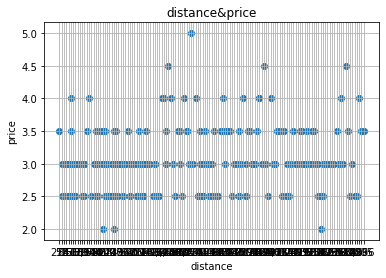

In [500]:
plt.scatter(jeju1, jeju2)
plt.xlabel('distance')
plt.ylabel('price')
plt.title('distance&price')
plt.grid(True)

In [495]:
test = jeju_df[['등급','후기_개수']].sort_values(by='등급', ascending=True)
test

,등급,후기_개수
79,2.0,4
192,2.0,8
215,2.0,28
268,2.5,1
237,2.5,4
...,...,...
134,4.0,100
245,4.5,324
136,4.5,833
61,4.5,"1,186"


In [503]:
counts = jeju_df['등급'].value_counts()

In [487]:
print(counts)

3.0    115
2.5     90
3.5     43
4.0     14
2.0      3
4.5      3
5.0      1
Name: 등급, dtype: int64


In [508]:
grade1 = ['3등급','2.5등급','3.5등급','4등급','4.5등급','2등급','5등급']

In [520]:
int(list(counts))

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

In [514]:
test1 = pd.Series(counts, index = grade1, name = '등급별 호텔 수')

In [516]:
test1

3등급     NaN
2.5등급   NaN
3.5등급   NaN
4등급     NaN
4.5등급   NaN
2등급     NaN
5등급     NaN
Name: 등급별 호텔 수, dtype: float64

In [502]:
jeju_df[["등급","후기_개수"]].sum(axis=1)

0      3.5
1      3.0
2      2.5
3      3.0
4      2.5
      ... 
264    2.5
265    2.5
266    2.5
267    3.5
268    2.5
Length: 269, dtype: float64

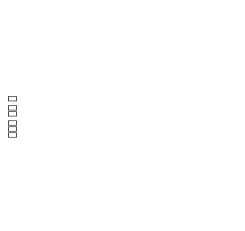

In [518]:
test1.plot.pie()
plt.show()

In [517]:
plt.show()

In [584]:
%matplotlib inline

In [585]:
import matplotlib.pyplot as plt

In [586]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [587]:
ax = fig.add_subplot(1,1,1)

In [588]:
ax

In [589]:
from numpy.random import randn

In [590]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [686]:
ax = fig.add_subplot(1,1,1)
ax.plot(randn(50).cumsum(), 'k--')

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


In [592]:
ax

In [689]:
ax = value_counts1.plot(kind='--')

AttributeError: 'Figure' object has no attribute 'plot'

In [692]:
all_df = pd.read_csv("data_all.csv",  encoding="euc-kr")
all_df

,지역,호텔명,주소,평점,가격,거리,등급,수영장_유무,후기_개수
0,1,제주 아시아 펜션 (Jeju Asia Pension),"애월읍 가문동길 79, 제주시, 제주특별자치도, 63050, 대한민국",2.0,"70,728",9.7,2.5,0,1
1,1,뷰티풀하우스 (Beautyfull House),"이어도로253번길 2, 서귀포시, 63543, 대한민국",2.0,"114,544",30.0,2.5,1,1
2,2,호텔 봄 (Hotel Bom),"충무대로34번길 11-32, 서구, 부산광역시, 부산광역시, 49269, 대한민국",2.0,"147,273",9.3,2.5,0,1
3,2,엠 모텔 송도 (M Motel Songdo),"송도해변로125번길 9, 서구, 부산광역시, 49269, 대한민국",2.0,"231,818",9.2,2.5,0,1
4,1,제주 알프스호텔 (Jeju Alps Hotel),"신산로 79, 제주시, 제주특별자치도, 63274, 대한민국",3.0,"61,362",3.9,2.5,0,2
...,...,...,...,...,...,...,...,...,...
534,2,그랜드 엘시티 레지던스 (Grand LCT Residence),"달맞이길 30 랜드마크동, 랜드마크 동, 부산광역시, 부산광역시, 48099, 대한민국",10.0,"2,495,455",9.9,4.0,0,1
535,2,아바호텔 (Ava Hotel),"서구 송도해변로 183, 부산광역시, 49269, 대한민국",10.0,"218,182",9.2,2.5,0,2
536,2,티에스 호텔 (TS Hotel),"중앙대로 1931, 부산광역시, 부산광역시, 46230, 대한민국",10.0,"127,274",12.0,2.5,0,1
537,2,행복한 공유 (Happy sharing),"중구 대청로 121-1, 부산광역시, 48932, 대한민국",10.0,"271,819",6.2,2.5,0,2


In [669]:
busan_df = pd.read_csv("data_busan.csv",  encoding="euc-kr")
type(busan_df)


pandas.core.frame.DataFrame

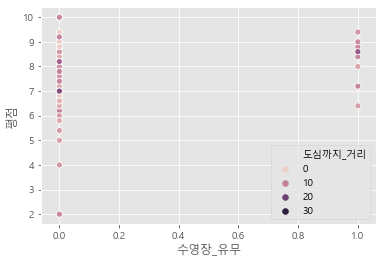

In [685]:
import seaborn as sns
sns.scatterplot(x=busan_df['수영장_유무'], y=busan_df['평점'], hue=busan_df['도심까지_거리'])
plt.show()

In [698]:
all_df = pd.read_csv("data_all.csv",  encoding="euc-kr")
value_counts1 = all_df['등급'].value_counts()

In [699]:
jeju_df = pd.read_csv("data_jeju.csv",  encoding="euc-kr")
value_counts2 = jeju_df['등급'].value_counts()

In [700]:
busan_df = pd.read_csv("data_busan.csv",  encoding="euc-kr")
value_counts3 = busan_df['등급'].value_counts()

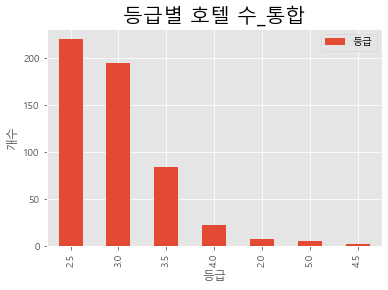

In [706]:
## Pandas와 Matplotlib pyplot 으로 차트 그리기
# 플롯 스타일 바꿔보기
 
## Jupyter Notebook의 Magic command로  notebook 내에서 figure를 볼 수 있게 해줌
%matplotlib inline 
 
## matplotlib의 pyplot import
import matplotlib.pyplot as plt
## pandas import 하기
import pandas as pd
from pandas import DataFrame
 
## ggplot style로 바꾸기
plt.style.use('ggplot')
 
## comma로 구분된 파일을 읽어 pandas DataFrame 객체에 넣기
df = value_counts1

## barplot 그리기
ax = df.plot(kind='bar')
 
## title 넣기
ax.set_title("등급별 호텔 수_통합", fontsize=20)
 
## x축 label 수정하기
ax.set_xlabel("등급")
 
 
## y축 label 수정하기
ax.set_ylabel("개수")
 
## legend 위치 조정
ax.legend(loc='best')



ValueError: 'c' argument has 50 elements, which is not acceptable for use with 'x' with size 1, 'y' with size 1.

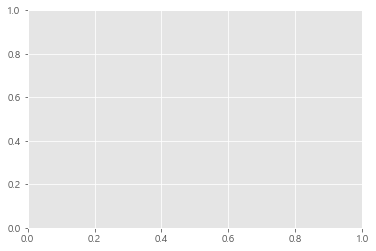

In [633]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = value_counts1
y = value_counts2
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()